In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,root_mean_squared_error, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [129]:
df = pd.read_csv('.//Survey_data2.csv')

In [56]:
df.shape

(28025, 9)

In [96]:
df.describe()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28025 entries, 0 to 28024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             28025 non-null  int64  
 1   RemoteWork      28025 non-null  int64  
 2   YearsCode       28025 non-null  float64
 3   Knowledge_1     28025 non-null  int64  
 4   JobSatPoints_1  28025 non-null  float64
 5   AISelect        28025 non-null  int64  
 6   JobSat          28025 non-null  int64  
 7   JobSatPoints_6  28025 non-null  float64
 8   JobSatPoints_8  28025 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 1.9 MB


In [58]:
df.dtypes

Age                 int64
RemoteWork          int64
YearsCode         float64
Knowledge_1         int64
JobSatPoints_1    float64
AISelect            int64
JobSat              int64
JobSatPoints_6    float64
JobSatPoints_8    float64
dtype: object

In [59]:
y = df['JobSat']

<Axes: >

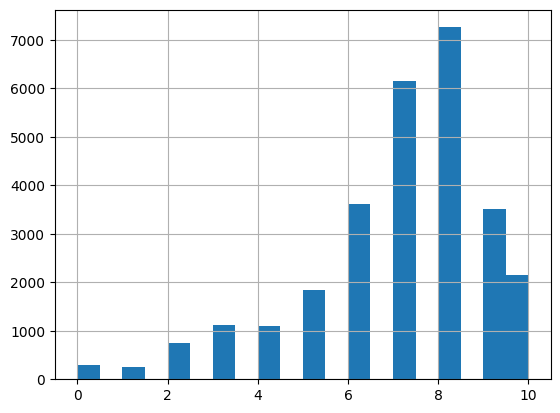

In [60]:
y.hist(bins=20)

In [61]:
X = df.drop('JobSat',axis=1)

In [62]:
corr_matrix = df.corr()

In [63]:
corr_matrix["JobSat"].sort_values(ascending=False)

JobSat            1.000000
Knowledge_1       0.146976
YearsCode         0.097195
JobSatPoints_1    0.094624
Age               0.070738
JobSatPoints_8    0.059057
JobSatPoints_6    0.051177
AISelect          0.022845
RemoteWork       -0.071433
Name: JobSat, dtype: float64

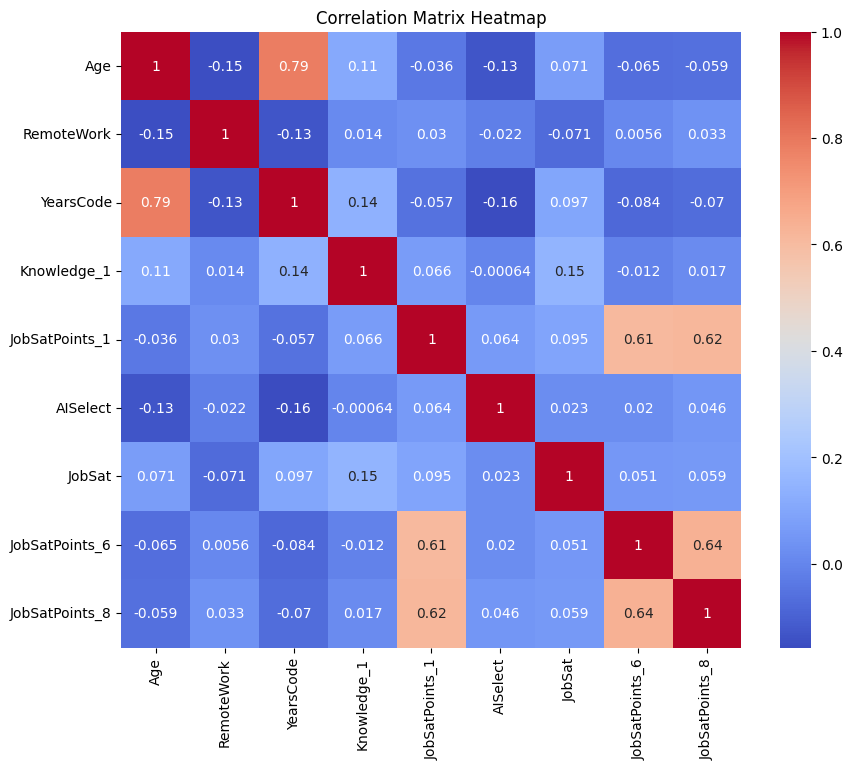

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RemoteWork'}>,
        <Axes: title={'center': 'YearsCode'}>],
       [<Axes: title={'center': 'Knowledge_1'}>,
        <Axes: title={'center': 'JobSatPoints_1'}>,
        <Axes: title={'center': 'AISelect'}>],
       [<Axes: title={'center': 'JobSatPoints_6'}>,
        <Axes: title={'center': 'JobSatPoints_8'}>, <Axes: >]],
      dtype=object)

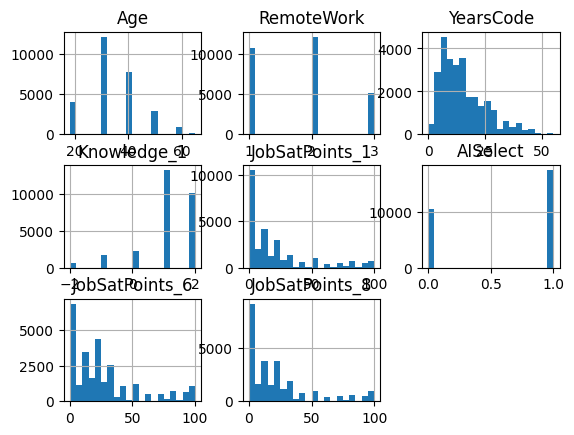

In [65]:
X.hist(bins=20)

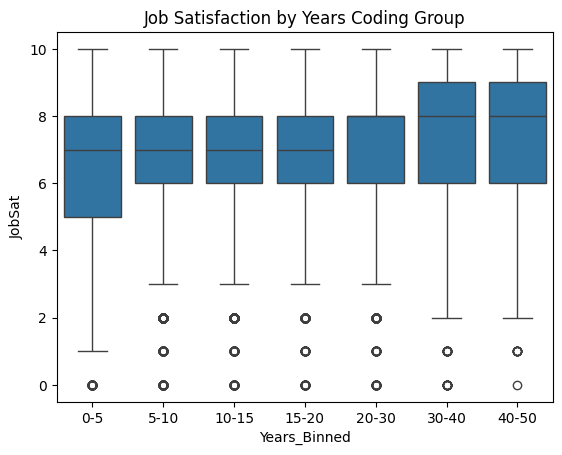

In [116]:

df['Years_Binned'] = pd.cut(df['YearsCode'], bins=[0,5,10,15,20,30,40,50], labels=['0-5','5-10','10-15','15-20','20-30','30-40','40-50'])
sns.boxplot(x='Years_Binned', y='JobSat', data=df)
plt.title('Job Satisfaction by Years Coding Group')
plt.show()





In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [78]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=13)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

[Text(0.5, 0.875, 'x[3] <= 1.5\ngini = 0.838\nsamples = 21018\nvalue = [217.0, 191.0, 564.0, 842.0, 829.0, 1384.0, 2729.0\n4667.0, 5406.0, 2582.0, 1607.0]'),
 Text(0.25, 0.625, 'x[3] <= -0.5\ngini = 0.84\nsamples = 13450\nvalue = [154, 138, 404, 594, 603, 993, 1905, 3148, 3266, 1467\n778]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 97.0\ngini = 0.869\nsamples = 1842\nvalue = [55, 40, 101, 120, 112, 151, 255, 392, 358, 136\n122]'),
 Text(0.0625, 0.125, 'gini = 0.868\nsamples = 1816\nvalue = [54.0, 40.0, 101.0, 119.0, 111.0, 150.0, 253.0, 388.0\n357.0, 133.0, 110.0]'),
 Text(0.1875, 0.125, 'gini = 0.737\nsamples = 26\nvalue = [1, 0, 0, 1, 1, 1, 2, 4, 1, 3, 12]'),
 Text(0.375, 0.375, 'x[4] <= 84.0\ngini = 0.835\nsamples = 11608\nvalue = [99.0, 98.0, 303.0, 474.0, 491.0, 842.0, 1650.0, 2756.0\n2908.0, 1331.0, 656.0]'),
 Text(0.3125, 0.125, 'gini = 0.834\nsamples = 11065\nvalue = [98.0, 97.0, 294.0, 464.0, 473.0, 817.0, 1600.0, 2652.0\n2758.0, 1231.0, 581.0]'),
 Text(0.437

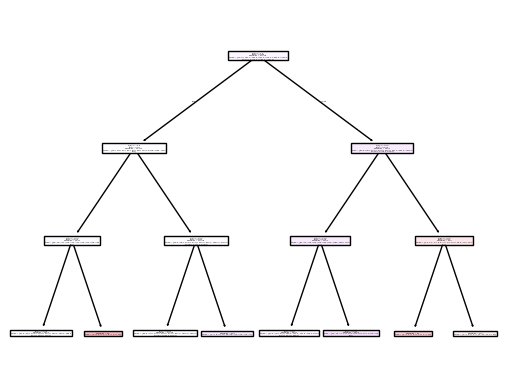

In [79]:
from sklearn.tree import plot_tree
plot_tree(model, filled=True)

In [80]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_pred_train, y_train)
acc_test = accuracy_score(y_pred_test, y_test)
print(acc_train)
print(acc_test)

0.2600628033114473
0.2647352647352647


In [118]:
train_mse = mean_squared_error(y_train, y_pred_train)
print(f'training MSE: {train_mse}')
test_mse = mean_squared_error(y_test, y_pred_test)
print(f'test MSE: {test_mse}')

training MSE: 5.285850223617851
test MSE: 5.327815042100756


In [120]:
train_rmse = np.sqrt(train_mse)
print(train_rmse)
test_rmse = np.sqrt(test_mse)
print(test_rmse)

2.299097697710528
2.3082060224556984


In [122]:
# New scenario- whether the model can classify repondents into age groups
df2 = pd.read_csv('.//Survey_data2.csv')
y = df2['Age']
X = df2.drop('Age',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = DecisionTreeClassifier(max_depth=3, random_state=13)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_pred_train, y_train)
acc_test = accuracy_score(y_pred_test, y_test)
print(acc_train)
print(acc_test)
train_rmse = np.sqrt(train_mse)
print(train_rmse)
test_rmse = np.sqrt(test_mse)
print(test_rmse)

0.6202302788086402
0.6086770372484658
2.299097697710528
2.3082060224556984
